In [ ]:
%pylab inline --no-import-all
import pandas as pd
import numpy as np
import os.path as path



Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas
print(pandas.__version__)

1.3.5


In [ ]:
def Boxplot_figure(Pam,PamB,PamR,x_data,x_title,fig_name):
    fig = plt.figure(figsize = (12, 6));
    ax1 = fig.subplots();
    
    c = "blue"
    bp1 = ax1.boxplot(Pam, positions=[-0.3,1.7,3.7,5.7,7.7,9.7], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color="white"),
            );

    c = "red"
    bp2 = ax1.boxplot(PamB, positions=[0.3,2.3,4.3,6.3,8.3,10.3], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color="white"),
            );

    c = "green"
    bp3 = ax1.boxplot(PamR, positions=[0.9,2.9,4.9,6.9,8.9,10.9], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color="white"),
            );

    plt.rcParams['font.size'] = '14'
    ax1.grid(linestyle='-.');
    
    ax1.set(xlim=[-1, 12],ylim=[4.2, 5.6],xticks=[0,2,4,6,8,10],xticklabels=x_data,xlabel=x_title);
    ax1.axhline(y=4.918, color='k', linestyle='--');
    
    ax1.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['Pam', 'Pam-I', 'Pam-CV'], loc='upper right');
    
    plt.savefig(fig_name);
    
    plt.show();


## Polynomial fitting method

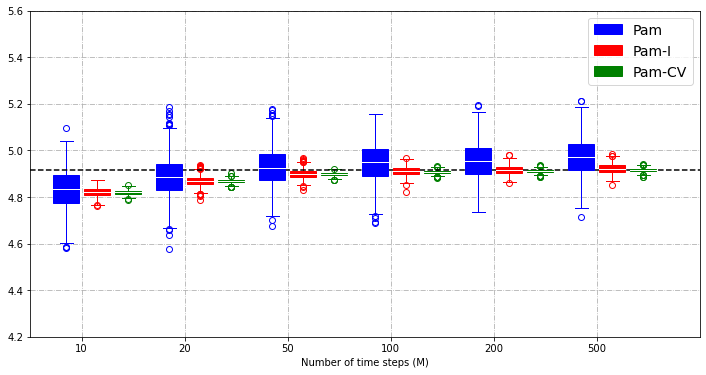

--------- Data table ----------------- 
     m       Pam  std(Pam)      PamB  std(PamB)      PamR  std(PamR)
0   10  4.833587  0.084552  4.820969   0.019512  4.820372   0.009247
1   20  4.885521  0.084141  4.868449   0.019874  4.867899   0.008181
2   50  4.927049  0.081362  4.899284   0.019541  4.897765   0.007968
3  100  4.950314  0.082298  4.912104   0.019392  4.908376   0.007885
4  200  4.957110  0.081047  4.916913   0.019576  4.912948   0.007728
5  500  4.971939  0.081621  4.922032   0.019398  4.916221   0.008039


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Poly

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# -----------------------------------------------------
# RF  Same Model
# -----------------------------------------------------
x_data = ['10', '20', '50', '100', '200', '500']
Pam=[]; PamB=[]; PamR=[];

N = '5000'

# AmOp_put_Poly_N5000_m20

for j in x_data:
    file = 'AmOp_put_Poly_N'+N+'_m'+j+'.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);

x_title = 'Number of time steps (M)'
fig_name = 'BoxPlot_Poly_N'+N+'.png'
Boxplot_figure(Pam,PamB,PamR,x_data,x_title,fig_name);


print("--------- Data table ----------------- ")
df = pd.DataFrame()
df['m'] = x_data
df['Pam'] = np.zeros(6);  df['std(Pam)'] = np.zeros(6);
df['PamB'] = np.zeros(6); df['std(PamB)'] = np.zeros(6);
df['PamR'] = np.zeros(6); df['std(PamR)'] = np.zeros(6);

for k in range(6):
    df['Pam'][k]  = np.mean(Pam[k]);  df['std(Pam)'][k]  = np.std(Pam[k]);
    df['PamB'][k] = np.mean(PamB[k]); df['std(PamB)'][k] = np.std(PamB[k]);
    df['PamR'][k] = np.mean(PamR[k]); df['std(PamR)'][k] = np.std(PamR[k]);

print(df)

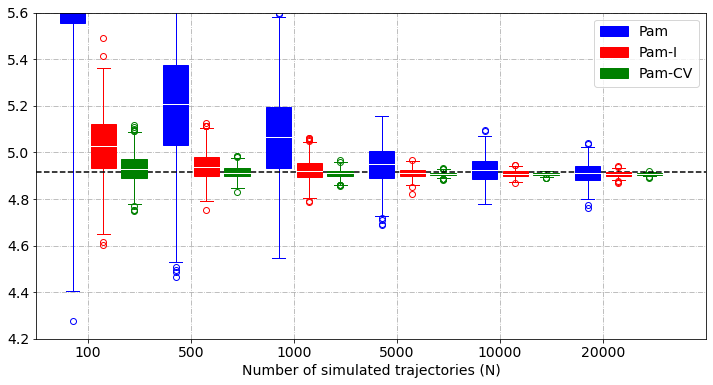

--------- Data table ----------------- 
       N       Pam  std(Pam)      PamB  std(PamB)      PamR  std(PamR)
0    100  5.979890  0.593810  5.027362   0.133804  4.929358   0.056555
1    500  5.210164  0.255059  4.941480   0.060606  4.914152   0.025282
2   1000  5.069007  0.189252  4.923548   0.044854  4.910178   0.018015
3   5000  4.950314  0.082298  4.912104   0.019392  4.908376   0.007885
4  10000  4.925344  0.056381  4.909009   0.013280  4.907520   0.005493
5  20000  4.913357  0.042342  4.907089   0.010231  4.906948   0.004064


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Poly

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# -----------------------------------------------------
# RF  Same Model
# -----------------------------------------------------
x_data = ['100', '500', '1000', '5000', '10000', '20000']
Pam=[]; PamB=[]; PamR=[];

m = '100'

# AmOp_put_Poly_N10000_m100

for j in x_data:
    file = 'AmOp_put_Poly_N'+j+'_m'+m+'.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);

x_title = 'Number of simulated trajectories (N)'
fig_name = 'BoxPlot_Poly_N'+N+'.png'
Boxplot_figure(Pam,PamB,PamR,x_data,x_title,fig_name);



print("--------- Data table ----------------- ")
df = pd.DataFrame()
df['N'] = x_data
df['Pam'] = np.zeros(6);  df['std(Pam)'] = np.zeros(6);
df['PamB'] = np.zeros(6); df['std(PamB)'] = np.zeros(6);
df['PamR'] = np.zeros(6); df['std(PamR)'] = np.zeros(6);

for k in range(6):
    df['Pam'][k]  = np.mean(Pam[k]);  df['std(Pam)'][k]  = np.std(Pam[k]);
    df['PamB'][k] = np.mean(PamB[k]); df['std(PamB)'][k] = np.std(PamB[k]);
    df['PamR'][k] = np.mean(PamR[k]); df['std(PamR)'][k] = np.std(PamR[k]);

print(df)


## Three different random forest models are used, one case for the Pam, another case for the Pam-I and the third case for the Pam-CV.


In [ ]:
# RF hyperparameters Pam
RF_n_estimators_Pam = 50;
RF_max_leaf_nodes_Pam = 20;

# RF hyperparameters Pam - I
RF_n_estimators_PamB=10      # Represents the number of trees randomly generated.
RF_max_leaf_nodes_PamB=15   # Grow trees with max_leaf_nodes in best-first fashion.

# RF hyperparameters Pam - CV
RF_n_estimators_PamR = 90;
RF_max_leaf_nodes_PamR = 100;

Test


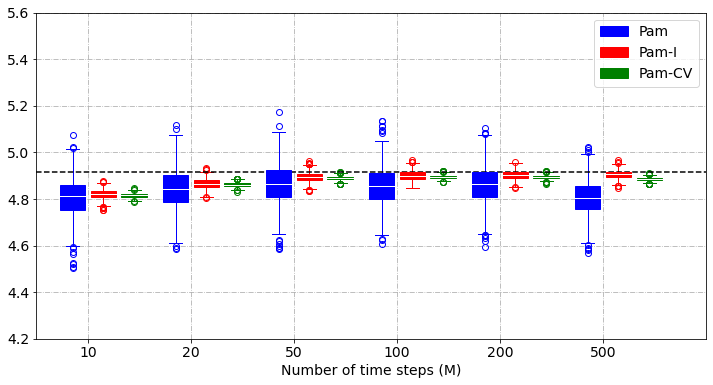

--------- TEST - Data table ----------------- 
     m       Pam  std(Pam)      PamB  std(PamB)      PamR  std(PamR)
0   10  4.806607  0.082886  4.819829   0.019302  4.816181   0.009003
1   20  4.842740  0.087102  4.865660   0.020432  4.862020   0.008709
2   50  4.864441  0.084182  4.895085   0.019804  4.889644   0.008184
3  100  4.857648  0.080538  4.901102   0.019057  4.895494   0.007591
4  200  4.863949  0.080289  4.904578   0.018721  4.895243   0.007479
5  500  4.804044  0.073081  4.905447   0.018230  4.885579   0.007416
--------- TRAIN - Data table ----------------- 


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     m       Pam  std(Pam)      PamB  std(PamB)      PamR  std(PamR)
0   10  4.865854  6.091204  4.823596   1.375385  4.817629   0.646307
1   20  4.938286  6.009091  4.872801   1.390205  4.862291   0.608804
2   50  4.984193  5.921302  4.907147   1.396091  4.893152   0.581564
3  100  5.024381  5.928403  4.920206   1.396594  4.898233   0.564670
4  200  5.046494  5.748950  4.930434   1.374986  4.894900   0.551857
5  500  4.959144  5.391706  4.927940   1.353031  4.887686   0.526890


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# -----------------------------------------------------
# RF  Test
# -----------------------------------------------------
x_data = ['10', '20', '50', '100', '200', '500']
Pam=[]; PamB=[]; PamR=[];

N = '5000'

# AmOp_put_RF_N5000_m100_Test.csv


for j in x_data:
    file = 'AmOp_put_RF_N'+N+'_m'+j+'_Test.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);

x_title = 'Number of time steps (M)'
fig_name = 'BoxPlot_RF_N'+N+'_Test.png'
print('Test')
Boxplot_figure(Pam,PamB,PamR,x_data,x_title,fig_name);



print("--------- TEST - Data table ----------------- ")
df = pd.DataFrame()
df['m'] = x_data
df['Pam'] = np.zeros(6);  df['std(Pam)'] = np.zeros(6);
df['PamB'] = np.zeros(6); df['std(PamB)'] = np.zeros(6);
df['PamR'] = np.zeros(6); df['std(PamR)'] = np.zeros(6);

for k in range(6):
    df['Pam'][k]  = np.mean(Pam[k]);  df['std(Pam)'][k]  = np.std(Pam[k]);
    df['PamB'][k] = np.mean(PamB[k]); df['std(PamB)'][k] = np.std(PamB[k]);
    df['PamR'][k] = np.mean(PamR[k]); df['std(PamR)'][k] = np.std(PamR[k]);

print(df)



print("--------- TRAIN - Data table ----------------- ")
Pam=[]; PamB=[]; PamR=[];

for j in x_data:
    file = 'AmOp_put_RF_N'+N+'_m'+j+'_Train.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);

df = pd.DataFrame()
df['m'] = x_data
df['Pam'] = np.zeros(6);  df['std(Pam)'] = np.zeros(6);
df['PamB'] = np.zeros(6); df['std(PamB)'] = np.zeros(6);
df['PamR'] = np.zeros(6); df['std(PamR)'] = np.zeros(6);

for k in range(6):
    df['Pam'][k]  = np.mean(Pam[k]);  df['std(Pam)'][k]  = np.std(Pam[k]);
    df['PamB'][k] = np.mean(PamB[k]); df['std(PamB)'][k] = np.std(PamB[k]);
    df['PamR'][k] = np.mean(PamR[k]); df['std(PamR)'][k] = np.std(PamR[k]);

print(df)


Test


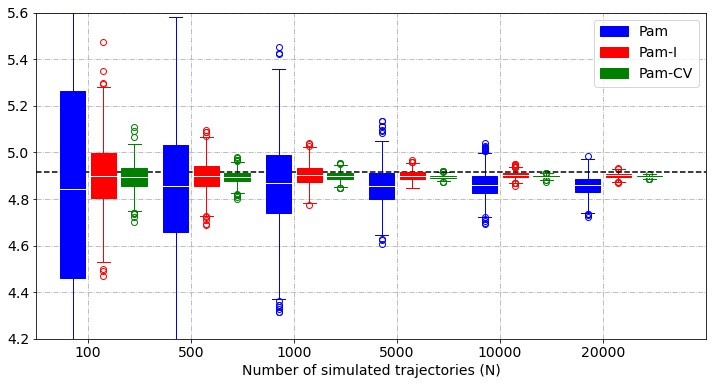

--------- TEST - Data table ----------------- 
       N       Pam  std(Pam)      PamB  std(PamB)      PamR  std(PamR)
0    100  4.865128  0.592033  4.901255   0.140395  4.893499   0.057617
1    500  4.850319  0.273368  4.899101   0.065036  4.894215   0.026330
2   1000  4.865939  0.189393  4.902981   0.044597  4.897220   0.017872
3   5000  4.857648  0.080538  4.901102   0.019057  4.895494   0.007591
4  10000  4.862516  0.055319  4.902803   0.013245  4.896258   0.005314
5  20000  4.858948  0.042511  4.901269   0.009987  4.895847   0.004028
--------- TRAIN - Data table ----------------- 


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


       N       Pam  std(Pam)      PamB  std(PamB)      PamR  std(PamR)
0    100  5.034000  5.913640  4.923320   1.393762  4.898291   0.566993
1    500  4.991816  5.874883  4.912695   1.387739  4.895938   0.564521
2   1000  5.009540  5.888266  4.916090   1.389830  4.898739   0.563774
3   5000  5.024381  5.928403  4.920206   1.396594  4.898233   0.564670
4  10000  5.003887  6.001348  4.908968   1.384397  4.897182   0.563762
5  20000  5.005723  5.947601  4.915011   1.395271  4.899545   0.567209


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# -----------------------------------------------------
# RF  Test
# -----------------------------------------------------
x_data = ['100','500', '1000', '5000', '10000', '20000']
Pam=[]; PamB=[]; PamR=[];

m = '100'

# AmOp_put_RF_N5000_m100_Test.csv

for j in x_data:
    file = 'AmOp_put_RF_N'+j+'_m'+m+'_Test.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);

x_title = 'Number of simulated trajectories (N)'
fig_name = 'BoxPlot_RF_m'+m+'_Test.png'
print('Test')
Boxplot_figure(Pam,PamB,PamR,x_data,x_title,fig_name);


print("--------- TEST - Data table ----------------- ")
df = pd.DataFrame()
df['N'] = x_data
df['Pam'] = np.zeros(6);  df['std(Pam)'] = np.zeros(6);
df['PamB'] = np.zeros(6); df['std(PamB)'] = np.zeros(6);
df['PamR'] = np.zeros(6); df['std(PamR)'] = np.zeros(6);

for k in range(6):
    df['Pam'][k]  = np.mean(Pam[k]);  df['std(Pam)'][k]  = np.std(Pam[k]);
    df['PamB'][k] = np.mean(PamB[k]); df['std(PamB)'][k] = np.std(PamB[k]);
    df['PamR'][k] = np.mean(PamR[k]); df['std(PamR)'][k] = np.std(PamR[k]);

print(df)



print("--------- TRAIN - Data table ----------------- ")
Pam=[]; PamB=[]; PamR=[];

for j in x_data:
    file = 'AmOp_put_RF_N'+j+'_m'+m+'_Train.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);

df = pd.DataFrame()
df['N'] = x_data
df['Pam'] = np.zeros(6);  df['std(Pam)'] = np.zeros(6);
df['PamB'] = np.zeros(6); df['std(PamB)'] = np.zeros(6);
df['PamR'] = np.zeros(6); df['std(PamR)'] = np.zeros(6);

for k in range(6):
    df['Pam'][k]  = np.mean(Pam[k]);  df['std(Pam)'][k]  = np.std(Pam[k]);
    df['PamB'][k] = np.mean(PamB[k]); df['std(PamB)'][k] = np.std(PamB[k]);
    df['PamR'][k] = np.mean(PamR[k]); df['std(PamR)'][k] = np.std(PamR[k]);

print(df)


## A single random forest model is used for all three cases: Pam, Pam-I and Pam-CV.

In [ ]:
# RF hyperparameters Pam
RF_n_estimators_Pam = 10;
RF_max_leaf_nodes_Pam = 15;

# RF hyperparameters Pam - I
RF_n_estimators_PamB=10      # Represents the number of trees randomly generated.
RF_max_leaf_nodes_PamB=15   # Grow trees with max_leaf_nodes in best-first fashion.

# RF hyperparameters Pam - CV
RF_n_estimators_PamR = 10;
RF_max_leaf_nodes_PamR = 15;

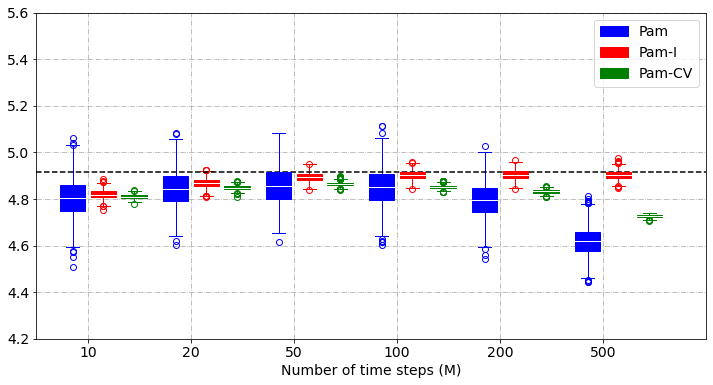

Test - A single random forest model is used for all three cases
--------- TEST - Data table ----------------- 
     m       Pam  std(Pam)      PamB  std(PamB)      PamR  std(PamR)
0   10  4.804385  0.084648  4.819662   0.019168  4.810668   0.009203
1   20  4.844603  0.080610  4.867653   0.019151  4.848770   0.008886
2   50  4.859098  0.079597  4.894012   0.019556  4.864035   0.008099
3  100  4.849685  0.079132  4.901910   0.019707  4.852447   0.007580
4  200  4.795947  0.074909  4.904139   0.019596  4.832433   0.007019
5  500  4.619389  0.064406  4.904011   0.018825  4.725581   0.006081
--------- TRAIN - Data table ----------------- 


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     m       Pam  std(Pam)      PamB  std(PamB)      PamR  std(PamR)
0   10  4.865854  6.091204  4.823596   1.375385  4.817629   0.646307
1   20  4.938286  6.009091  4.872801   1.390205  4.862291   0.608804
2   50  4.984193  5.921302  4.907147   1.396091  4.893152   0.581564
3  100  5.024381  5.928403  4.920206   1.396594  4.898233   0.564670
4  200  5.046494  5.748950  4.930434   1.374986  4.894900   0.551857
5  500  4.959144  5.391706  4.927940   1.353031  4.887686   0.526890


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# -----------------------------------------------------
# RF  Same Model
# -----------------------------------------------------
x_data = ['10', '20', '50', '100', '200', '500']
Pam=[]; PamB=[]; PamR=[];

N = '5000'

# AmOp_put_RF_N5000_m100_Test.csv

for j in x_data:
    file = 'AmOp_put_RF_N'+N+'_m'+j+'.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);
        
x_title = 'Number of time steps (M)'
fig_name = 'BoxPlot_RF_N'+N+'_SameModel.png'
Boxplot_figure(Pam,PamB,PamR,x_data,x_title,fig_name);

print('Test - A single random forest model is used for all three cases')


print("--------- TEST - Data table ----------------- ")
df = pd.DataFrame()
df['m'] = x_data
df['Pam'] = np.zeros(6);  df['std(Pam)'] = np.zeros(6);
df['PamB'] = np.zeros(6); df['std(PamB)'] = np.zeros(6);
df['PamR'] = np.zeros(6); df['std(PamR)'] = np.zeros(6);

for k in range(6):
    df['Pam'][k]  = np.mean(Pam[k]);  df['std(Pam)'][k]  = np.std(Pam[k]);
    df['PamB'][k] = np.mean(PamB[k]); df['std(PamB)'][k] = np.std(PamB[k]);
    df['PamR'][k] = np.mean(PamR[k]); df['std(PamR)'][k] = np.std(PamR[k]);

print(df)



print("--------- TRAIN - Data table ----------------- ")
Pam=[]; PamB=[]; PamR=[];

for j in x_data:
    file = 'AmOp_put_RF_N'+N+'_m'+j+'_Train.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);

df = pd.DataFrame()
df['m'] = x_data
df['Pam'] = np.zeros(6);  df['std(Pam)'] = np.zeros(6);
df['PamB'] = np.zeros(6); df['std(PamB)'] = np.zeros(6);
df['PamR'] = np.zeros(6); df['std(PamR)'] = np.zeros(6);

for k in range(6):
    df['Pam'][k]  = np.mean(Pam[k]);  df['std(Pam)'][k]  = np.std(Pam[k]);
    df['PamB'][k] = np.mean(PamB[k]); df['std(PamB)'][k] = np.std(PamB[k]);
    df['PamR'][k] = np.mean(PamR[k]); df['std(PamR)'][k] = np.std(PamR[k]);

print(df)



# Model RN.


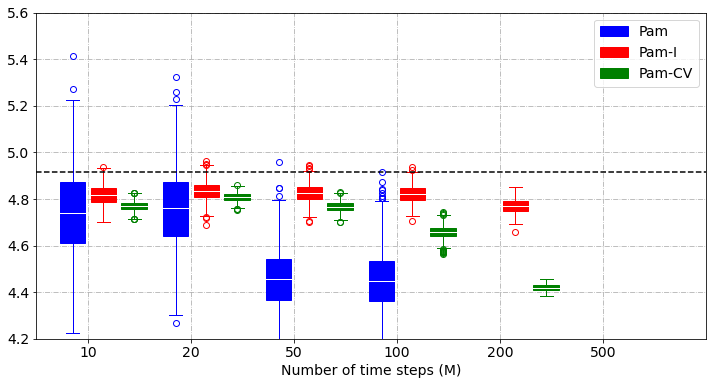

In [ ]:
#RN
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# -----------------------------------------------------
# RF  Same Model
# -----------------------------------------------------
x_data = ['10', '20', '50', '100', '200', '500']
Pam=[]; PamB=[]; PamR=[];

N = '1000'

# AmOp_put_RF_N5000_m100_Test.csv

for j in x_data:
    file = 'AmOp_put_RN_N'+N+'_m'+j+'.csv'
    if path.exists(file):
        data = pd.read_csv(file,header=None);
        Pam.append(data[2]); PamB.append(data[3]); PamR.append(data[4]);

x_title = 'Number of time steps (M)'
fig_name = 'BoxPlot_RN_N'+N+'_SameModel.png'
Boxplot_figure(Pam,PamB,PamR,x_data,x_title,fig_name);



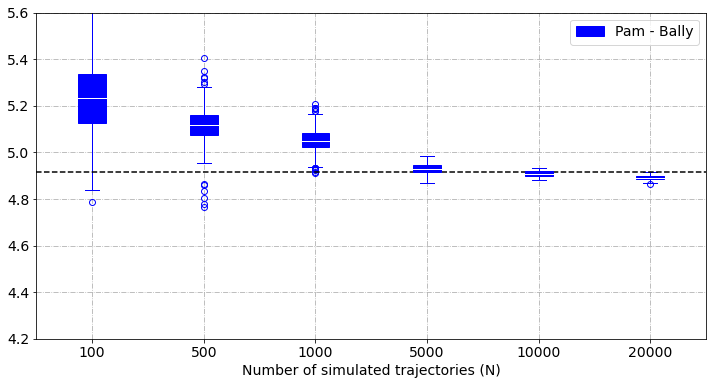

In [ ]:





x_data = ['100','500', '1000', '5000', '10000', '20000']

PATH = '/Users/raul/Google Drive/PublicationRM/Simulation Malliavin/data/'

PricesCV=[]; DeltaCV=[]; Time=[];
data = pd.read_csv(PATH+"xoshiro_Bally_CV_N100_m100.csv",header=None); PricesCV.append(data[0]); DeltaCV.append(data[1]); Time.append(data[2]);
data = pd.read_csv(PATH+"xoshiro_Bally_CV_N500_m100.csv",header=None); PricesCV.append(data[0]); DeltaCV.append(data[1]); Time.append(data[2]);
data = pd.read_csv(PATH+"xoshiro_Bally_CV_N1000_m100.csv",header=None); PricesCV.append(data[0]); DeltaCV.append(data[1]); Time.append(data[2]);
data = pd.read_csv(PATH+"xoshiro_Bally_CV_N5000_m100.csv",header=None); PricesCV.append(data[0]); DeltaCV.append(data[1]); Time.append(data[2]);
data = pd.read_csv(PATH+"xoshiro_Bally_CV_N10000_m100.csv",header=None); PricesCV.append(data[0]); DeltaCV.append(data[1]); Time.append(data[2]);
data = pd.read_csv(PATH+"xoshiro_Bally_CV_N20000_m100.csv",header=None); PricesCV.append(data[0]); DeltaCV.append(data[1]); Time.append(data[2]);

#fig, ax = plt.figure(figsize = (16, 12));


fig = plt.figure(figsize = (12, 6));
ax = fig.subplots();

c = "blue"
bp = ax.boxplot(PricesCV, positions=[0,2,4,6,8,10], patch_artist=True,
        boxprops=dict(facecolor=c, color=c),
        capprops=dict(color=c),
        whiskerprops=dict(color=c),
        flierprops=dict(color=c, markeredgecolor=c),
        medianprops=dict(color="white"),
        );






plt.rcParams['font.size'] = '14'
ax.grid(linestyle='-.');

x_title = 'Number of simulated trajectories (N)'

ax.set(xlim=[-1, 11],ylim=[4.2, 5.6],xticks=[0,2,4,6,8,10],xticklabels=x_data,xlabel=x_title);
ax.axhline(y=4.918, color='k', linestyle='--');


ax.legend([bp["boxes"][0]], ['Pam - Bally'], loc='upper right');

plt.savefig('BoxPlot_Bally_m100.png')

plt.show(); 






